## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.199261). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 90s 2ms/step - loss: 1.7068 - accuracy: 0.5047 - val_loss: 1.7297 - val_accuracy: 0.4969
Epoch 36/50
  512/50000 [..............................] - ETA: 4:02 - loss: 1.6809 - accuracy: 0.5117

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102836). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 31s 613us/step - loss: 1.6948 - accuracy: 0.5051 - val_loss: 1.7515 - val_accuracy: 0.4930
Epoch 37/50
  768/50000 [..............................] - ETA: 34s - loss: 1.6654 - accuracy: 0.5234

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.250482). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.126239). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 17s 348us/step - loss: 1.6850 - accuracy: 0.5076 - val_loss: 1.7242 - val_accuracy: 0.4973
Epoch 38/50
  768/50000 [..............................] - ETA: 2:13 - loss: 1.6929 - accuracy: 0.4779

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.295046). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148523). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 18s 359us/step - loss: 1.6751 - accuracy: 0.5102 - val_loss: 1.7294 - val_accuracy: 0.4905
Epoch 39/50
  768/50000 [..............................] - ETA: 23s - loss: 1.6692 - accuracy: 0.5182

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148946). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 18s 353us/step - loss: 1.6653 - accuracy: 0.5122 - val_loss: 1.7526 - val_accuracy: 0.4829
Epoch 40/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.6570 - accuracy: 0.5110 - val_loss: 1.7110 - val_accuracy: 0.4874
Epoch 41/50
50000/50000 [==============================] - 18s 354us/step - loss: 1.6518 - accuracy: 0.5140 - val_loss: 1.7113 - val_accuracy: 0.4882
Epoch 42/50
50000/50000 [==============================] - 18s 355us/step - loss: 1.6450 - accuracy: 0.5158 - val_loss: 1.7187 - val_accuracy: 0.4892
Epoch 43/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.6398 - accuracy: 0.5160 - val_loss: 1.6944 - val_accuracy: 0.4860
Epoch 44/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.6338 - accuracy: 0.5192 - val_loss: 1.7011 - val_accuracy: 0.4893
Epoch 45/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.6298 - accuracy: 0.5186 - va

50000/50000 [==============================] - 19s 370us/step - loss: 1.2011 - accuracy: 0.6274 - val_loss: 1.4814 - val_accuracy: 0.5273
Epoch 37/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.1851 - accuracy: 0.6315 - val_loss: 1.4881 - val_accuracy: 0.5319
Epoch 38/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1735 - accuracy: 0.6359 - val_loss: 1.5414 - val_accuracy: 0.5208
Epoch 39/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.1616 - accuracy: 0.6413 - val_loss: 1.5296 - val_accuracy: 0.5220
Epoch 40/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.1494 - accuracy: 0.6442 - val_loss: 1.5687 - val_accuracy: 0.5154
Epoch 41/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.1386 - accuracy: 0.6497 - val_loss: 1.4689 - val_accuracy: 0.5378
Epoch 42/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.1289 - accuracy: 0.6521 - va

50000/50000 [==============================] - 31s 625us/step - loss: 1.0773 - accuracy: 0.6209 - val_loss: 1.3527 - val_accuracy: 0.5270
Epoch 34/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.0621 - accuracy: 0.6247 - val_loss: 1.3531 - val_accuracy: 0.5263
Epoch 35/50
50000/50000 [==============================] - 21s 418us/step - loss: 1.0499 - accuracy: 0.6306 - val_loss: 1.3306 - val_accuracy: 0.5333
Epoch 36/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.0393 - accuracy: 0.6359 - val_loss: 1.3774 - val_accuracy: 0.5244
Epoch 37/50
  512/50000 [..............................] - ETA: 11:26 - loss: 1.0221 - accuracy: 0.6270

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.432751). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.217875). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 71s 1ms/step - loss: 1.0271 - accuracy: 0.6372 - val_loss: 1.3669 - val_accuracy: 0.5308
Epoch 38/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.0143 - accuracy: 0.6422 - val_loss: 1.3507 - val_accuracy: 0.5331
Epoch 39/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.0015 - accuracy: 0.6488 - val_loss: 1.3558 - val_accuracy: 0.5289
Epoch 40/50
50000/50000 [==============================] - 19s 377us/step - loss: 0.9863 - accuracy: 0.6529 - val_loss: 1.4226 - val_accuracy: 0.5156
Epoch 41/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.9814 - accuracy: 0.6553 - val_loss: 1.3635 - val_accuracy: 0.5279
Epoch 42/50
50000/50000 [==============================] - 20s 409us/step - loss: 0.9605 - accuracy: 0.6613 - val_loss: 1.4445 - val_accuracy: 0.5157
Epoch 43/50
50000/50000 [==============================] - 36s 719us/step - loss: 0.9515 - accuracy: 0.6663 - val_

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.109936). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 20s 403us/step - loss: 1.1917 - accuracy: 0.5792 - val_loss: 1.3601 - val_accuracy: 0.5199
Epoch 26/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.1752 - accuracy: 0.5871 - val_loss: 1.3695 - val_accuracy: 0.5172
Epoch 27/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.1623 - accuracy: 0.5909 - val_loss: 1.3547 - val_accuracy: 0.5188
Epoch 28/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.1478 - accuracy: 0.5963 - val_loss: 1.3438 - val_accuracy: 0.5242
Epoch 29/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.1342 - accuracy: 0.6013 - val_loss: 1.3769 - val_accuracy: 0.5139
Epoch 30/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1220 - accuracy: 0.6033 - val_loss: 1.3482 - val_accuracy: 0.5226
Epoch 31/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.1096 - accuracy: 0.6094 - va

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.728738). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.365368). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 20s 395us/step - loss: 0.9116 - accuracy: 0.6801 - val_loss: 1.4814 - val_accuracy: 0.5093
Epoch 48/50
50000/50000 [==============================] - 16s 320us/step - loss: 0.8979 - accuracy: 0.6846 - val_loss: 1.3632 - val_accuracy: 0.5359
Epoch 49/50
50000/50000 [==============================] - 45s 894us/step - loss: 0.8918 - accuracy: 0.6880 - val_loss: 1.5054 - val_accuracy: 0.5044
Epoch 50/50
  768/50000 [..............................] - ETA: 6:41 - loss: 0.9243 - accuracy: 0.6602

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.118464). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 95s 2ms/step - loss: 0.8743 - accuracy: 0.6949 - val_loss: 1.4101 - val_accuracy: 0.5267


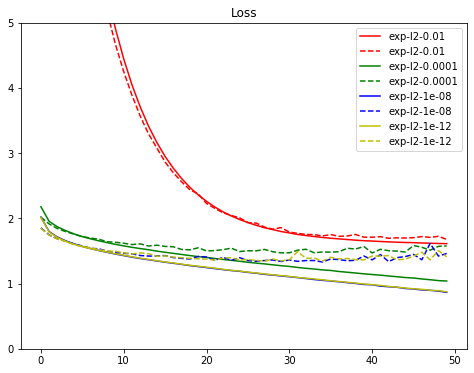

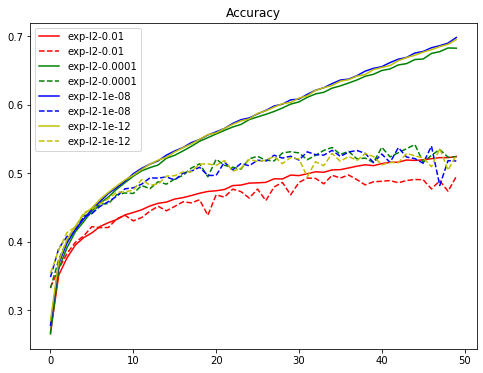

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()